<h1 align=center>Projet de Méthodes numériques pour les EDP : partie pratique</h1>

**M1 MApI3** / Groupe : Sébastien Roux, Anh Tuan Vũ, Sophie Willemot, Mehdi Zouitine

In [1]:
import numpy as np
import matplotlib.pyplot as plt

L'équation de Burgers est une équation qui sert à la modélisation des fluides, des phénomènes acoustiques et du trafic routier. Cette équation est définie comme:
$$\frac{\partial u}{\partial t}+u \frac{\partial u}{\partial x} =\nu \frac{\partial^{2} u}{\partial x^{2}}$$
L'équation de Burgers est étudiée sous 2 formes :
* `L'équation de Burgers sans viscosité` : $\frac{\partial u}{\partial t}+u \frac{\partial u}{\partial x}=0$
* `L'équation de Burgers avec viscosité` : $\frac{\partial u}{\partial t}+u \frac{\partial u}{\partial x}=\nu \frac{\partial^{2} u}{\partial x^{2}}$ où $\nu$ est le terme de viscosité.

La résolution exacte de l'équation de Burgers sans viscosité est semblable à la résolution d'une équation de transport. On utilise la `méthode des caractéristiques`.

# Résolution de l'équation non-visqueuse

On cherche une ligne caractéristique où l'équation non-visqueuse se réduit à une $EDO$.

Donc :

$$\frac{\mathrm{d} u[x(s), t(s)]}{\mathrm{d} s} = \frac{\mathrm{d} t}{\mathrm{d} s} \frac{\partial u}{\partial t}+\frac{\mathrm{d} x}{\mathrm{d} s} \frac{\partial u}{\partial x} = 0$$


On retrouve l'équation de Burgers non visqueuse en posant :

$$\begin{aligned}
&\frac{\mathrm{d} t}{\mathrm{d} s}=1 \\
&\frac{\mathrm{d} x}{\mathrm{d} s}=u 
\end{aligned}$$

et en supposant que $t(0) = 0$ on a :

$$\begin{array}{l}
t(s)=s \\
x(s)=x_{0}+u s=x_{0}+u t
\end{array}$$

Les caractéristiques sont des droites de pente $\nu$ sur lesquelles la solution est constante.

Comme pour l'équation de transport la solution est donnée par : $u = u(x_0)$ où $x_0$, qui correspond au pied de la caractéristique $x_0 = x_c – ut_c$.

# Résolution de l'équation visqueuse

La résolution de l'équation visqueuse est nettement plus compliquée. C'est pour cela qu'on la résout numériquement avec différents schémas **aux différences finies** présentés ci dessous.

## Schéma explicite


Pour calculer numériquement les solutions de l'équation visqueuse  nous avons besoin d'approximer les termes de l'équation : 


$$\frac{\partial u}{\partial t}+u \frac{\partial u}{\partial x} - \nu \frac{\partial^{2} u}{\partial x^{2}} = 0$$


* Le terme $\frac{\partial u}{\partial t} \approx \frac{u_{j}^{n+1}-u_{j}^{n}}{\Delta t}$



* Le terme $u \frac{\partial u}{\partial x}  \approx \frac{u_{j}^{n}\left(u_{j+1}^{n}-u_{j-1}^{n}\right)}{2 \Delta x}$


* Le terme $- \nu \frac{\partial^{2} u}{\partial x^{2}} \approx -\frac{\nu\left(u_{j-1}^{n}-2 u_{j}^{n}+u_{j+1}^{n}\right)}{\Delta x^{2}}$

Nous aboutissons donc au schéma suivant :

$$
\frac{u_{j}^{n+1}-u_{j}^{n}}{\Delta t}+\frac{u_{j}^{n}\left(u_{j+1}^{n}-u_{j-1}^{n}\right)}{2 \Delta x}-\frac{\nu\left(u_{j-1}^{n}-2 u_{j}^{n}+u_{j+1}^{n}\right)}{\Delta x^{2}}=0
$$

On le réécrit :
$$
u_{j}^{n+1} = u_{j}^{n} - \frac{\Delta t}{2 \Delta x}u_{j}^{n}\left(u_{j+1}^{n}-u_{j-1}^{n}\right) + \frac{\nu \Delta t}{\Delta x^{2}}\left(u_{j-1}^{n}-2 u_{j}^{n}+u_{j+1}^{n}\right)
$$

On notera donc $A$ et $B$ les matrices telles que
$$AU =u_{j-1}^{n}-2 u_{j}^{n}+u_{j+1}^{n} \text{ (deuxième parenthèse)}$$
et
$$BU = u_{j+1}^{n}-u_{j-1}^{n} \text{ (première parenthèse)}.$$

In [2]:
f = lambda x : (x**2)/2

def explicite(N,dT,tend,nu):
    h = 1/(N+1)
    K=int(tend/dT)
    
    A = np.diag(-2*np.ones(N))+np.diag(1*np.ones(N-1),-1)+np.diag(1*np.ones(N-1),1)
    B = np.diag(-1*np.ones(N-1),-1)+np.diag(1*np.ones(N-1),1)
    #I = np.ones((N,N))
    
    x=np.linspace(h,1-h,N)
    u=np.sin(2*np.pi*x) #initialisation
    #u_0 = lambda y : 3*(y==0)
    #u = u_0(x)

    for i in range(K):
        F = np.dot(B,f(u))
        #u = u - dT/(2*h) * np.dot(u,np.dot(B,u)) + nu*dT/(h**2) * np.dot(A,u)
        u = u - dT/(2*h) * F + nu*dT/(h**2) * np.dot(A,u)
        #if i<=2 :
            #plt.plot(x,u,'r')
        
    return u

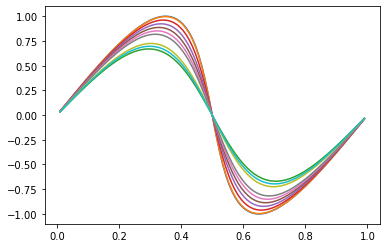

In [3]:
N = 100
tend = 0.1
dT = 10**-4
nu = [0.0001,0.001,0.1,0.01,0.02,0.03,0.04,0.05,0.08,0.09] #1/2 point particulier = explosion : instable

U=[]
for i in range(len(nu)) :
    U.append(explicite(N,dT,tend,nu[i]))

h=1/(N+1)
x=np.linspace(h,1-h,N)

for i in U :
    plt.plot(x,i)
#U

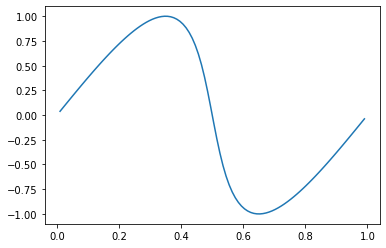

In [4]:
N = 100
tend = 0.1
dT = 10**-4
nu = 0.00000000000000001

U = explicite(N,dT,tend,nu)

h=1/(N+1)
x=np.linspace(h,1-h,N)

plt.plot(x,U);
#U

## Schéma implicite

L'utilisation du schéma implicite nous permet d'éviter des problèmes d'instabilité.

$$
\frac{\Delta u_{j}^{n+1}}{\Delta t}=-\frac{L_{x}\left(F_{j}^{n}+F_{j}^{n+1}\right)}{2}+v \frac{L_{x x}\left(u_{j}^{n}+u_{j}^{n+1}\right)}{2}
$$

$$
\text { où } \Delta u_{j}^{n+1}=u_{j}^{n+1}-u_{j}^{n} \quad L_{x}=\frac{(-1,0,1)}{2 \Delta x} \quad \text { et } \quad L_{x x}=\frac{(1,-2,1)}{\Delta x^{2}}
$$

In [5]:
def implicite(n,dt,tf,nu):
    
    dx = 1/n
    r = nu*dt/(dx*dx)
    
    X = np.zeros(n+1)
    U1 = np.zeros(n+1)
    a = np.zeros(n+1)
    b = np.zeros(n+1)
    c = np.zeros(n+1)
    d = np.zeros(n+1)
    c2 = np.zeros(n+1)
    d2 = np.zeros(n+1)
    
    for i in range(n+1):
        X[i]=(i-1)*dx
    
    for i in range(n+1):
        U1[i]=np.sin(2*np.pi*(i-1)/n)
    t=0
    while t < tf :
        t=t+dt
    
        for j in range(1,n+1):
            a[j] = -0.25*dt*U1[j-1]/dx - 0.5*r
        for j in range(n+1):
            b[j] = 1+r
        for j in range(n):
            c[j] = 0.25*dt*U1[j+1]/dx - 0.5*r

        d[0]=(1-r)*U1[0] + 0.5*r*U1[1]
        d[n]=0.5*r*U1[n-1] + (1-r)*U1[n]
        for j in range(1,n):
            d[j] = 0.5*r*U1[j-1] + (1-r)*U1[j] + 0.5*r*U1[j+1]

        c2[0] = c[0]/b[0]
        d2[0] = d[0]/b[0]
        for i in range(1,n+1):
            c2[i] = c[i] / (b[i]-a[i]*c2[i-1])
            d2[i] = (d[i]-a[i]*d2[i-1]) / (b[i]-a[i]*c2[i-1])

        U1[n] = d2[n]
        for i in range(n):
            U1[n-1-i] = d2[n-1-i] - U1[n-2-i+2]*c2[n-1-i]
            
    return X,U1

Essai pour $\nu = 10^{-3}$ et divers temps finaux :

In [6]:
n = 500
dt = 10**-4
tf = [0,0.1,0.2,0.3,0.5,1,2]
nu = 10**-3

U_f1=[]
for t in tf :
    X,U = implicite(n,dt,t,nu)
    U_f1.append(U)

Affichage des solutions obtenues :

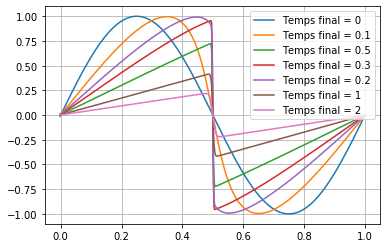

In [7]:
plt.figure(figsize = (12,8))

for j, i in enumerate(U_f1) :
    plt.plot(X, i, label = "Temps final = "+str(tf[j]))

plt.legend();
plt.grid();

Essai pour $\nu = 10^{-4}$ et deux temps finaux :

In [8]:
n = 500
dt = 10**-4
tf = [0.1,0.5]
nu = 10**-4

U_f=[]
for i in tf :
    X,U = implicite(n,dt,i,nu)
    U_f.append(U)

Affichage :

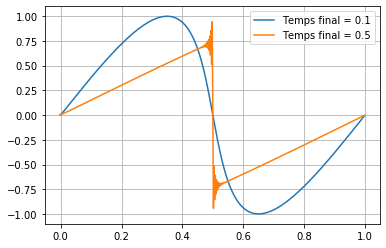

In [9]:
plt.figure(figsize = (12,8))

for j, i in enumerate(U_f) :
    plt.plot(X, i, label = "Temps final = "+str(tf[j]))

plt.legend();
plt.grid();

On constate ici que pour une viscosité $\nu$ trop faible, la solution "explose" au point $\frac{1}{2}$. Il faudrait sûrement utiliser un autre schéma pour éviter cela.

Essai pour divers $\nu$ et pour $t_{final} = 0.3$ :

In [10]:
n = 500
dt = 10**-4
tf = 0.3
nu = [0.001,0.1,0.01,0.05,0.08,0.03,0.02,0.04,0.06,0.07,0.09]

U_f=[]
for i in nu :
    X,U = implicite(n,dt,tf,i)
    U_f.append(U)

Affichage :

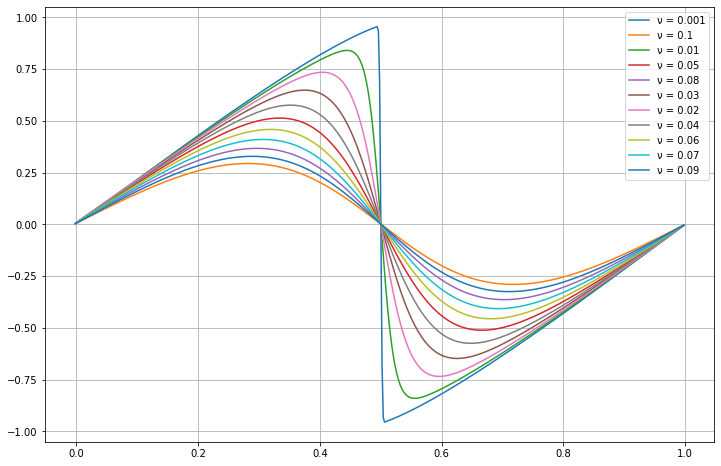

In [16]:
plt.figure(figsize = (12,8))

for j, i in enumerate(U_f) :
    plt.plot(X, i, label = "ν = "+str(nu[j]))

plt.legend();
plt.grid();

Aprés avoir implémenté le schéma démandé dans l'enoncé nous nous somme intéressé par curiosité à une methode numérique, la `méthode parabolique` :
En partant de l'equation: $$u_{t}+u u_{x}=\nu u_{x x}$$ nous pouvons la réecrire avec :

$$u_{t}+[f(u)]_{x}=\nu u_{x x} \quad \text { avec } \quad f(u)=\frac{u^{2}}{2} $$
en integrant entre $x_{j-1 / 2}$ et $x_{j+1 / 2}$ de chaques cotés de l'inégalité notre equation se reduit à : 
$$\int_{x_{j-1 / 2}}^{x_{j+1 / 2}} u_{t} d x-\left[\nu u_{x}\right]_{x_{j-1 / 2}}^{x_{j+1 / 2}}=-[f(u)]_{x_{j-1 / 2}}^{x_{j+1 / 2}} \quad \quad \quad (*)$$

Maintenant nous allons approximer chacun de ces termes : 

* `Le premier terme peut être approximé par` : $\int_{x_{j-1 / 2}}^{x_{j+1 / 2}} u_{t} d x \approx \frac{d u}{d t}\left(x_{j}, t\right) h$

* `Le deuxième terme peut être approximé par` : $-\left[\nu u_{x}\right]_{x_{j-1 / 2}}^{x_{j+1 / 2}}=\nu\left[u_{x}\left(x_{j-1 / 2}, t\right)-u_{x}\left(x_{j+1 / 2}, t\right)\right] \approx \nu\left[\frac{u\left(x_{j}, t\right)-u\left(x_{j-1}, t\right)}{h}-\frac{u\left(x_{j+1}, t\right)-u\left(x_{j}, t\right)}{h}\right] = -\nu \frac{u\left(x_{j+1}, t\right)-2 u\left(x_{j}, t\right)+u\left(x_{j-1}, t\right)}{h}$

* `Le dernier terme peut être approximé` : $-[f(u)]_{x_{j-1 / 2}}^{x_{j+1 / 2}}=f\left(u\left(x_{j-1 / 2}, t\right)\right)-f\left(u\left(x_{j+1 / 2}, t\right)\right)$

En rassemblant toutes les approximations dans l'equation $(*)$ et en divisant par $h$ on obtient un système d'$EDO$ :
$$\frac{d U_{j}}{d t}-\nu \frac{U_{j+1}-2 U_{j}+U_{j-1}}{h^{2}}=\frac{f\left(U_{j-\frac{1}{2}}\right)-f\left(U_{j+\frac{1}{2}}\right)}{h}$$  où $U_{j}(t) = u\left(x_{j}, t\right)$

On obtient finalement le shéma explicite suivant: 

$$U_{j}^{n+1}=U_{j}^{n}+k\left(\nu \frac{U_{j+1}^{n}-2 U_{j}^{n}+U_{j-1}^{n}}{h^{2}}+\frac{f\left(U_{j+\frac{1}{2}}^{n}\right)-f\left(U_{j-\frac{1}{2}}\right)}{h}\right)$$

où $f\left(U_{j_{-}+\frac{1}{2}}\right)$ est la moyenne $f\left(U_{j}\right)$ de  $f\left(U_{j_{-} 1}\right) $.

Ci dessous les résultats de la methode: Nous comprenons assez peu le comportement des solutions obtenues mais nous avons trouvé intéressant d'essayer une autre approche.

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

Définition de la condition initiale et des fonctions utilisées plus tard :

In [19]:
def uinit(x):
#     return np.array([1.*(x_i <= 0) for x_i in x])
    return np.sin(2*np.pi*x)

f = lambda u: 0.5 * u**2

Test et affichage :

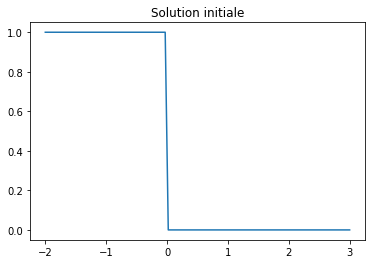

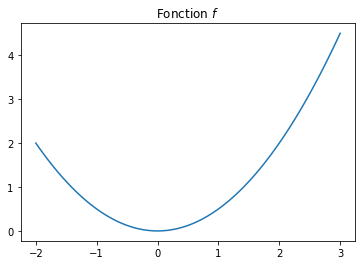

In [3]:
abscisses = np.linspace(-2, 3, 100)
plt.plot(abscisses, uinit(abscisses)); plt.title("Solution initiale");
plt.show()

plt.plot(abscisses, f(abscisses)); plt.title("Fonction $f$");

Paramètres :

In [4]:
x_end = 2
t_end = 2

# Précision en espace
N = 100
dx = x_end/N

x = np.arange(0, x_end, dx)

# Précision en temps
dt = 0.1
nt = int(t_end / dt)
dt = t_end / nt

Préparation de la condition initiale :

In [20]:
u0 = uinit(x)

u = np.copy(u0)
result = np.zeros(np.shape(u0))
U = np.zeros((nt,len(u)))

Le schéma :

In [21]:
V = 0.05

for i in range(nt):
    end = len(u) - 1
    fminus = 0.5 * (f(u[1:end-1]) + f(u[0:end-2]))
    fplus  = 0.5 * (f(u[1:end-1]) + f(u[2:end]))
    
    result[1:end-1] = u[1:end-1] + dt * (V * (u[2:end] - 2*u[1:end-1]
                    + u[0:end-2])/dx**2 - (fplus - fminus)/dx)
    
    result[0]   = u[0]
    result[end] = u[end]

    u = result
    U[i, :] = u

C:\Users\sebir\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in square
  """
C:\Users\sebir\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in subtract
  if __name__ == '__main__':


Affichage de la solution :

C:\Users\sebir\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Z contains NaN values. This may result in rendering artifacts.
C:\Users\sebir\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


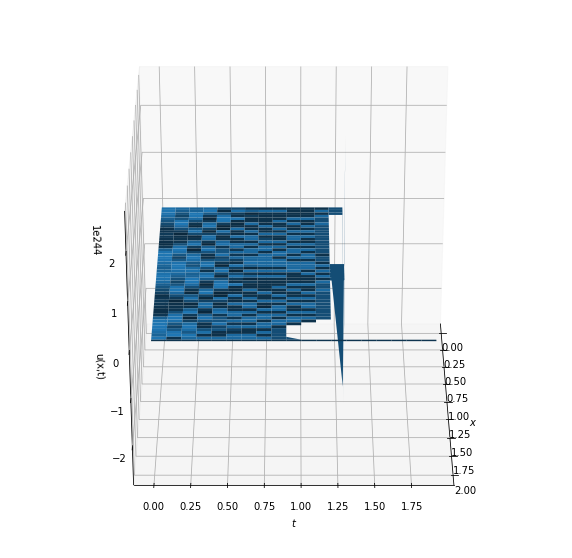

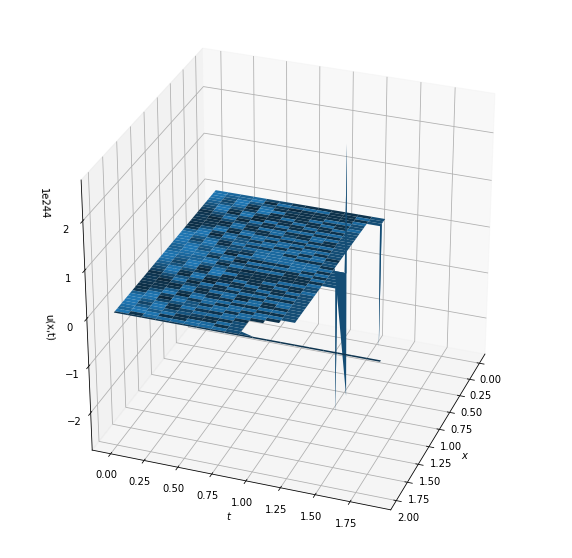

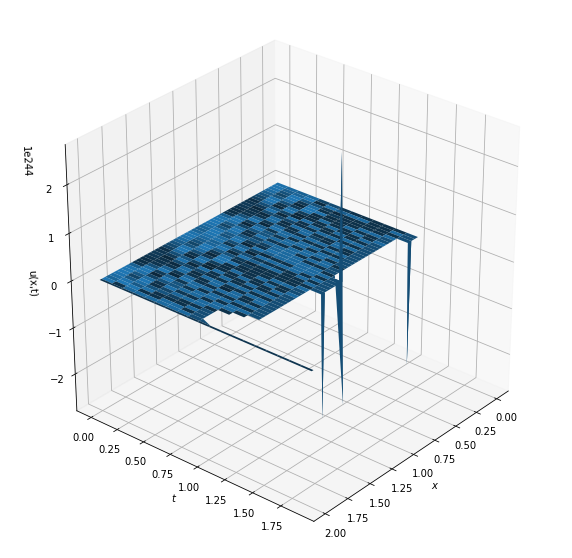

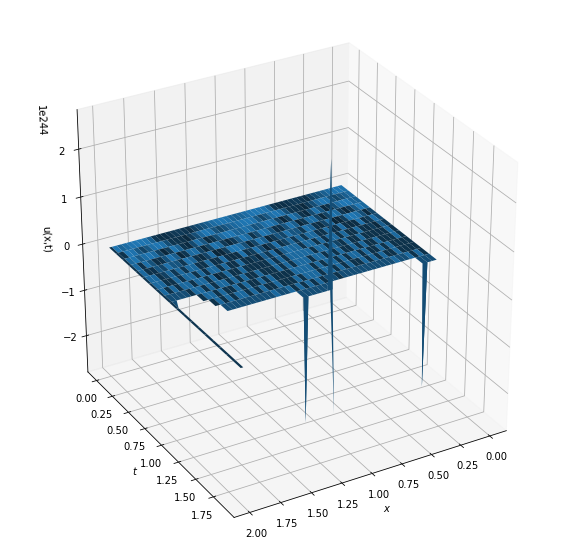

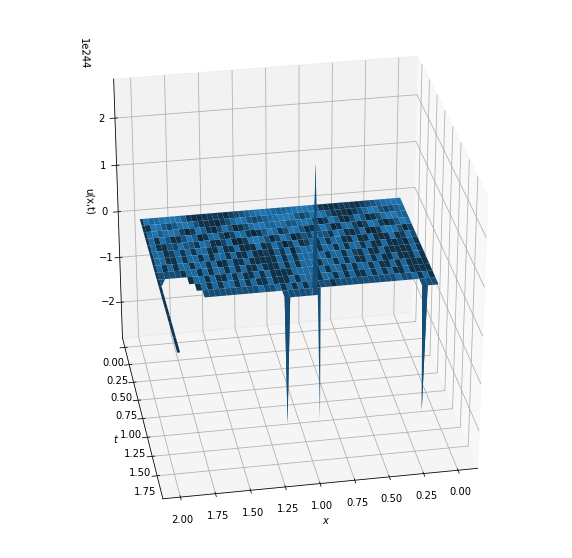

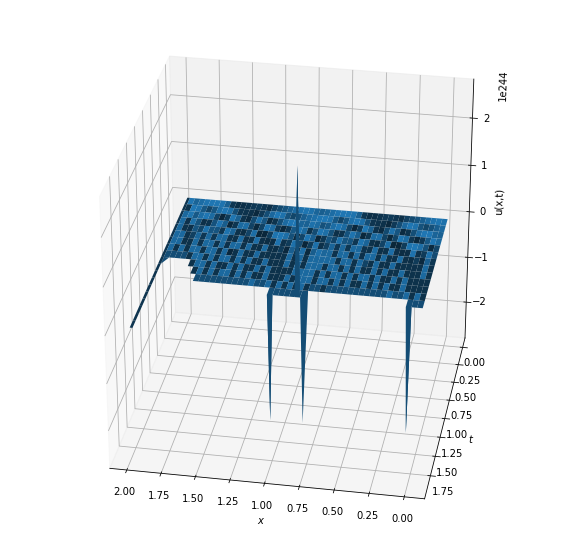

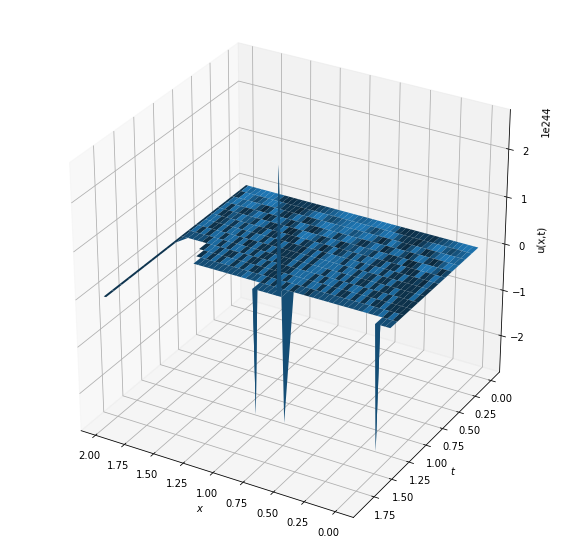

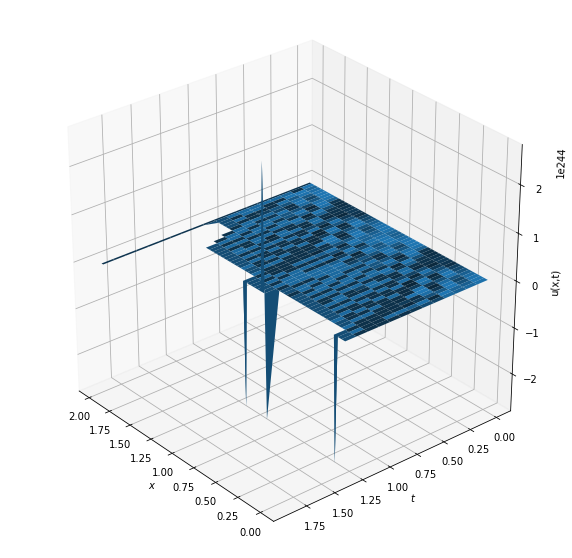

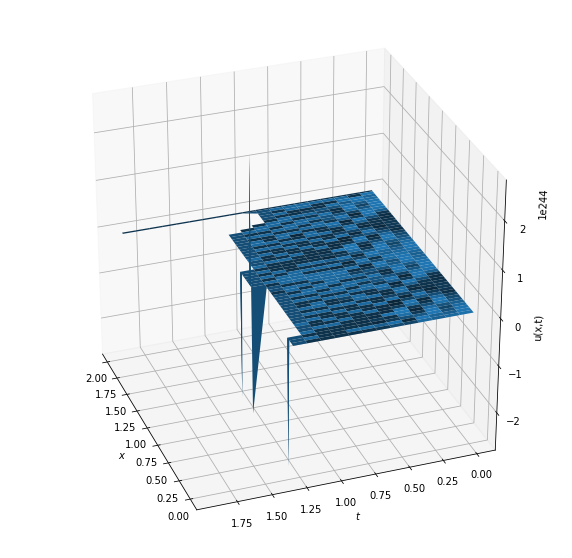

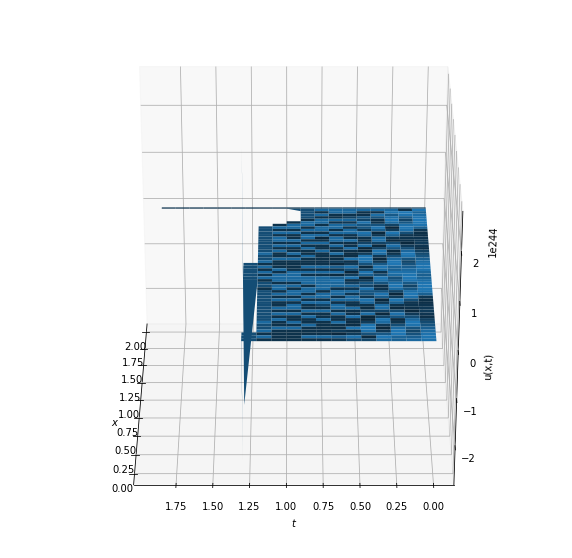

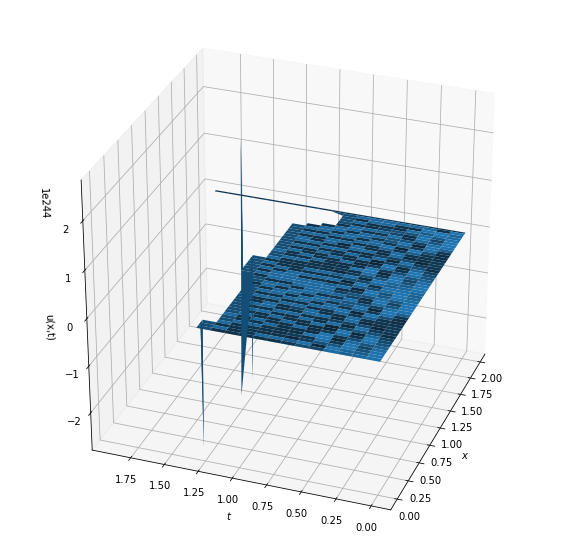

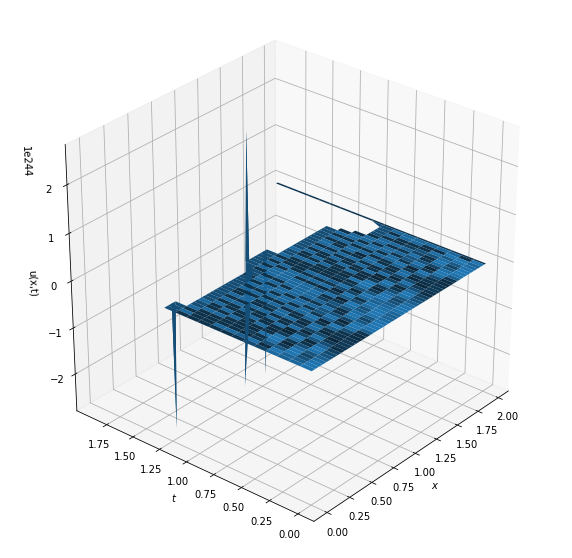

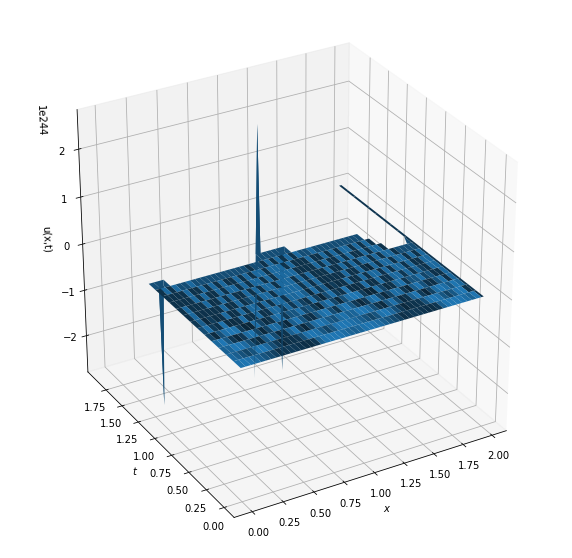

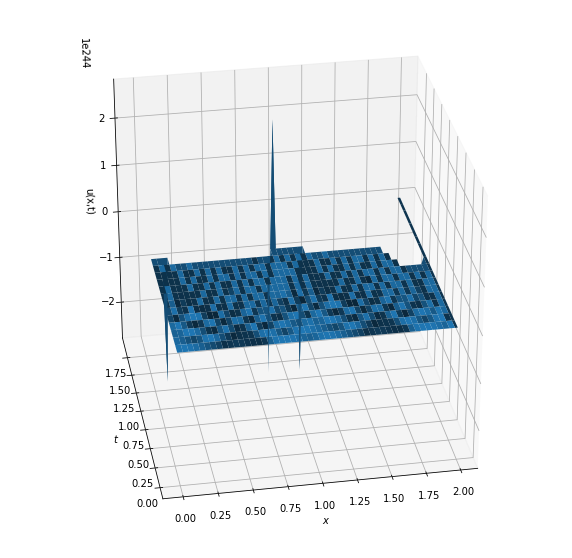

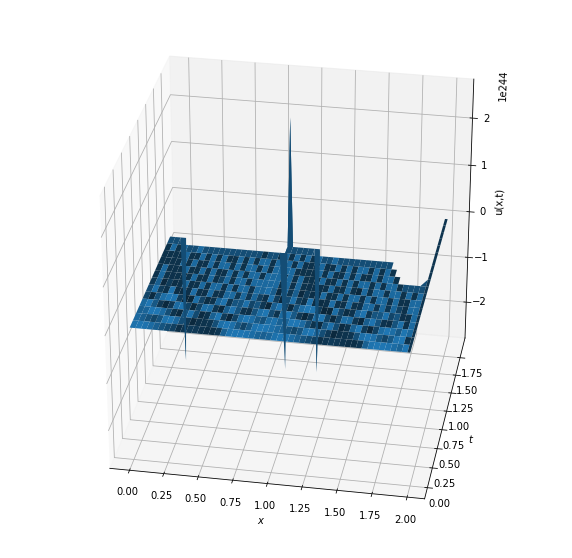

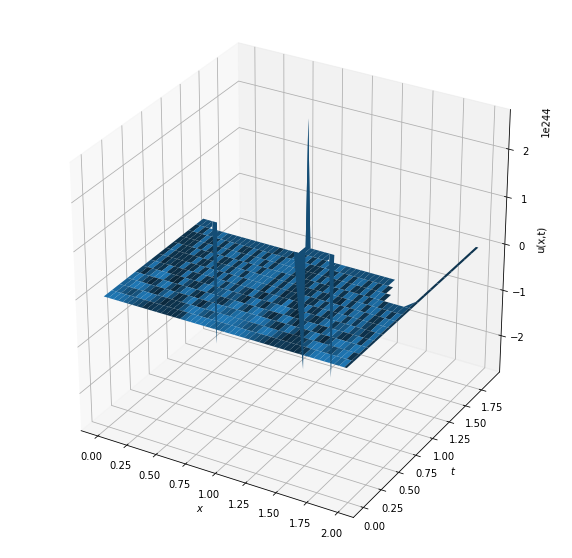

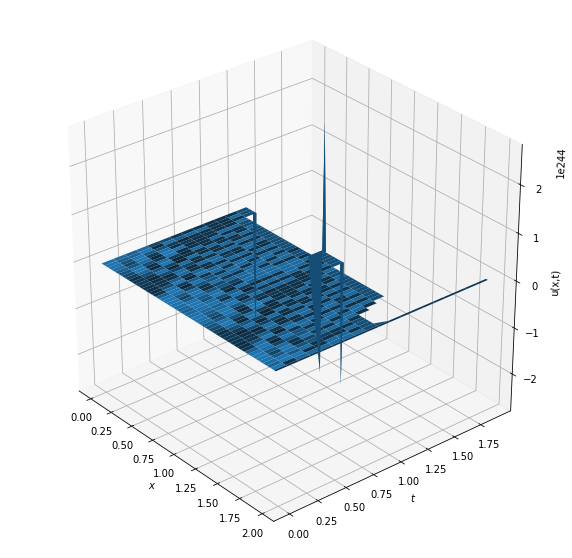

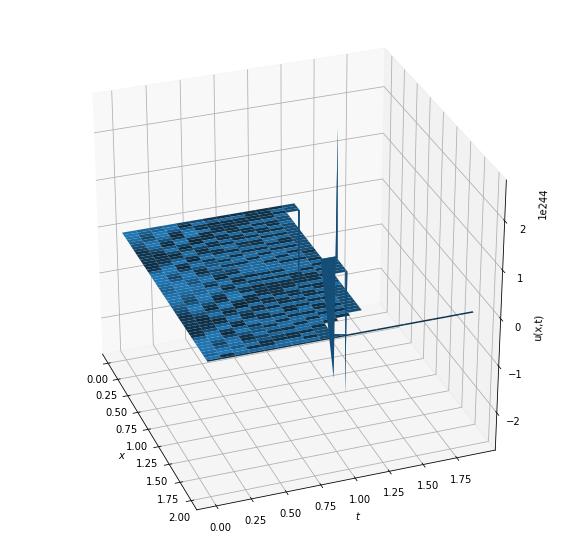

In [22]:
T = np.arange(0, t_end, dt)

# Préparation données
abscisses, ordonnées = np.meshgrid(x, T)

fig = plt.figure(figsize = (15,10))
ax = fig.gca(projection='3d')

# Angle
ax.view_init(30, 120)

ax.plot_surface(abscisses, ordonnées, U)

# Nom des axes
ax.set_xlabel('$x$'); ax.set_ylabel('$t$'); ax.set_zlabel('u(x,t)');
fig.show()

